In [2]:
!pip install rasterio
!pip install geopandas
!pip install sentinelsat
import os, sys
import numpy as np
import rasterio
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
import getpass

import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

%matplotlib inline

     |████████████████████████████████| 18.0MB 226kB/s 
     |████████████████████████████████| 921kB 2.5MB/s 
     |████████████████████████████████| 11.8MB 322kB/s 
     |████████████████████████████████| 10.1MB 51.5MB/s 


In [3]:
# connect to the API
user = 'Username' # enter the username
# user = input('Sentinel Hub Username: ')
pw = getpass.getpass('Sentinel Hub Password: ')
api = SentinelAPI(user, pw, 'https://scihub.copernicus.eu/dhus')

# download single scene by known product id
#api.download(<product_id>)

Sentinel Hub Password: ··········


In [4]:
api

## specify a geometry from http://geojson.io ... this is near Denver 

In [0]:
gj_geom = {
"type": "FeatureCollection",
"name": "SELECT",
"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },
"features": [
{ "type": "Feature", "properties": { }, "geometry": { "type": "Polygon", "coordinates": [ [ [ 78.790282313505003, 14.722851905653091, 0.0 ], [ 78.78944315111346, 14.723002082692179, 0.0 ], [ 78.789509498945648, 14.724354341456941, 0.0 ], [ 78.790479227929708, 14.724338990131089, 0.0 ], [ 78.790282313505003, 14.722851905653091, 0.0 ] ] ] } }
]
}


## Execute a search query. for all keyword options, see lower section of https://scihub.copernicus.eu/twiki/do/view/SciHubUserGuide/3FullTextSearch 

In [57]:
# search by polygon, time, and Hub query keywords... 
# 7/24/2016 is date of DG strip which was used for impervious surface mapping
# 6/1/2018 - 7/31/2019 are containement dates for durango 416 fire
# 12/4/2017 - 1/12/2018 are containment dates for Thomas fire

footprint = geojson_to_wkt(gj_geom)
products_S2 = api.query(footprint,
                     date = ('20191201', date(2019, 12, 15)),
                     platformname = 'Sentinel-2',
                     cloudcoverpercentage = (0, 30))
 
# products_S1 = api.query(footprint,
#                      date = ('20191201', date(2019, 12, 15)),
#                      platformname = 'Sentinel-1', 
#                      polarizationmode = 'VV')

SentinelAPIError: ignored

In [0]:
products_S1 = api.query(footprint,
                         date = ('20191201', date(2019, 12, 15)), 
                        producttype='SLC')

In [60]:
products_S1

OrderedDict([('4ad1ad42-193c-4dbd-b6a9-00b38820cca4',
              {'acquisitiontype': 'NOMINAL',
               'beginposition': datetime.datetime(2019, 12, 14, 0, 39, 35, 761000),
               'endposition': datetime.datetime(2019, 12, 14, 0, 40, 2, 723000),
               'filename': 'S1A_IW_SLC__1SDV_20191214T003935_20191214T004002_030337_03786D_0B42.SAFE',
               'footprint': 'MULTIPOLYGON (((78.808105 13.698874, 79.143959 15.329204, 76.817497 15.767323, 76.499695 14.140973, 78.808105 13.698874)))',
               'format': 'SAFE',
               'gmlfootprint': '<gml:Polygon srsName="http://www.opengis.net/gml/srs/epsg.xml#4326" xmlns:gml="http://www.opengis.net/gml">\n   <gml:outerBoundaryIs>\n      <gml:LinearRing>\n         <gml:coordinates>13.698874,78.808105 14.140973,76.499695 15.767323,76.817497 15.329204,79.143959 13.698874,78.808105</gml:coordinates>\n      </gml:LinearRing>\n   </gml:outerBoundaryIs>\n</gml:Polygon>',
               'identifier': 'S1A_IW_SLC_

In [0]:
s1_items = list(products_S1.items())
s1_items[0]

# should also be able to convert to pandas
s1_res_df = api.to_geodataframe(products_S1)
s2_res_df = api.to_geodataframe(products_S2)

In [62]:
# s1_res_df.plot()
# plt.show()
s1_res_df.shape, s2_res_df.shape


((5, 33), (1, 32))

In [64]:
print('Sentinel-1 results')
s1_res_df.head()

Sentinel-1 results


,title,link,link_alternative,link_icon,summary,beginposition,endposition,ingestiondate,missiondatatakeid,slicenumber,orbitnumber,lastorbitnumber,relativeorbitnumber,lastrelativeorbitnumber,sensoroperationalmode,swathidentifier,orbitdirection,producttype,timeliness,platformname,platformidentifier,instrumentname,instrumentshortname,filename,format,productclass,polarisationmode,acquisitiontype,status,size,identifier,uuid,geometry
4ad1ad42-193c-4dbd-b6a9-00b38820cca4,S1A_IW_SLC__1SDV_20191214T003935_20191214T0040...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-12-14T00:39:35.761Z, Instrument: SA...",2019-12-14 00:39:35.761,2019-12-14 00:40:02.723,2019-12-14 05:47:00.476,227437,20,30337,30337,165,165,IW,IW1 IW2 IW3,DESCENDING,SLC,Fast-24h,Sentinel-1,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S1A_IW_SLC__1SDV_20191214T003935_20191214T0040...,SAFE,S,VV VH,NOMINAL,ARCHIVED,7.27 GB,S1A_IW_SLC__1SDV_20191214T003935_20191214T0040...,4ad1ad42-193c-4dbd-b6a9-00b38820cca4,"MULTIPOLYGON (((78.80810 13.69887, 79.14396 15..."
d159aaa7-f7dd-440d-9e70-f78dc1cd963e,S1A_IW_SLC__1SDV_20191209T003127_20191209T0031...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-12-09T00:31:27.962Z, Instrument: SA...",2019-12-09 00:31:27.962,2019-12-09 00:31:55.891,2019-12-09 08:35:15.674,226770,13,30264,30264,92,92,IW,IW1 IW2 IW3,DESCENDING,SLC,Fast-24h,Sentinel-1,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S1A_IW_SLC__1SDV_20191209T003127_20191209T0031...,SAFE,S,VV VH,NOMINAL,ARCHIVED,7.36 GB,S1A_IW_SLC__1SDV_20191209T003127_20191209T0031...,d159aaa7-f7dd-440d-9e70-f78dc1cd963e,"MULTIPOLYGON (((80.78610 13.29193, 81.13383 14..."
c05af45d-46b1-494c-988a-2e482b5b4cc4,S1B_IW_SLC__1SDV_20191208T003857_20191208T0039...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-12-08T00:38:57.953Z, Instrument: SA...",2019-12-08 00:38:57.953,2019-12-08 00:39:24.909,2019-12-08 04:31:47.226,148992,12,19266,19266,165,165,IW,IW1 IW2 IW3,DESCENDING,SLC,Fast-24h,Sentinel-1,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S1B_IW_SLC__1SDV_20191208T003857_20191208T0039...,SAFE,S,VV VH,NOMINAL,ARCHIVED,7.06 GB,S1B_IW_SLC__1SDV_20191208T003857_20191208T0039...,c05af45d-46b1-494c-988a-2e482b5b4cc4,"MULTIPOLYGON (((78.76142 13.47415, 79.09710 15..."
5e75fe94-b134-48b6-bf39-90769a362615,S1B_IW_SLC__1SDV_20191203T003049_20191203T0031...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-12-03T00:30:49.151Z, Instrument: SA...",2019-12-03 00:30:49.151,2019-12-03 00:31:16.108,2019-12-03 04:32:21.393,148425,12,19193,19193,92,92,IW,IW1 IW2 IW3,DESCENDING,SLC,Fast-24h,Sentinel-1,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S1B_IW_SLC__1SDV_20191203T003049_20191203T0031...,SAFE,S,VV VH,NOMINAL,ARCHIVED,7.04 GB,S1B_IW_SLC__1SDV_20191203T003049_20191203T0031...,5e75fe94-b134-48b6-bf39-90769a362615,"MULTIPOLYGON (((80.76354 13.18381, 81.09911 14..."
d59375f7-071a-476c-babf-edeb5901f023,S1A_IW_SLC__1SDV_20191202T003936_20191202T0040...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-12-02T00:39:36.135Z, Instrument: SA...",2019-12-02 00:39:36.135,2019-12-02 00:40:03.095,2019-12-02 05:49:42.031,225888,20,30162,30162,165,165,IW,IW1 IW2 IW3,DESCENDING,SLC,Fast-24h,Sentinel-1,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S1A_IW_SLC__1SDV_20191202T003936_20191202T0040...,SAFE,S,VV VH,NOMINAL,ARCHIVED,7.27 GB,S1A_IW_SLC__1SDV_20191202T003936_20191202T0040...,d59375f7-071a-476c-babf-edeb5901f023,"MULTIPOLYGON (

In [65]:
print('Sentinel-2 results')
s2_res_df.head()

Sentinel-2 results


,title,link,link_alternative,link_icon,summary,datatakesensingstart,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,cloudcoverpercentage,sensoroperationalmode,tileid,hv_order_tileid,format,processingbaseline,platformname,filename,instrumentname,instrumentshortname,size,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,level1cpdiidentifier,uuid,geometry
5949b107-6d3e-4be8-a4b9-f685974b0dc4,S2A_MSIL1C_20191210T051211_N0208_R019_T43PHS_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-12-10T05:12:11.024Z, Instrument: MS...",2019-12-10 05:12:11.024,2019-12-10 05:12:11.024,2019-12-10 05:12:11.024,2019-12-10 11:00:13.221,23325,19,27.0693,INS-NOBS,43PHS,PS43H,SAFE,02.08,Sentinel-2,S2A_MSIL1C_20191210T051211_N0208_R019_T43PHS_2...,Multi-Spectral Instrument,MSI,817.45 MB,GS2A_20191210T051211_023325_N02.08,S2MSI1C,2015-028A,DESCENDING,Sentinel-2A,Level-1C,S2A_MSIL1C_20191210T051211_N0208_R019_T43PHS_2...,S2A_OPER_MSI_L1C_TL_EPAE_20191210T081559_A0233...,5949b107-6d3e-4be8-a4b9-f685974b0dc4,"MULTIPOLYGON (((78.79801 14.35393, 78.81538 15..."


In [66]:
s2_res_df.describe()['cloudcoverpercentage']

count     1.0000
mean     27.0693
std          NaN
min      27.0693
25%      27.0693
50%      27.0693
75%      27.0693
max      27.0693
Name: cloudcoverpercentage, dtype: float64

In [67]:
s1_res_df.describe()

,missiondatatakeid,slicenumber,orbitnumber,lastorbitnumber,relativeorbitnumber,lastrelativeorbitnumber
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,195502.400000,15.400000,25844.400000,25844.400000,135.800000,135.800000
std,42720.794331,4.219005,6038.924929,6038.924929,39.983747,39.983747
min,148425.000000,12.000000,19193.000000,19193.000000,92.000000,92.000000
25%,148992.000000,12.000000,19266.000000,19266.000000,92.000000,92.000000
50%,225888.000000,13.000000,30162.000000,30162.000000,165.000000,165.000000
75%,226770.000000,20.000000,30264.000000,30264.000000,165.000000,165.000000
max,227437.000000,20.000000,30337.000000,30337.000000,165.000000,165.000000


In [70]:
## subset Sentinel-1 results by 'producttype'
prod_groups_list = list(s1_res_df.groupby('producttype'))
for i, item in enumerate(prod_groups_list):
    print(i, 'producttype: ', item[0])
    
# GRD_df = prod_groups_list[0][1]
# RAW_df = prod_groups_list[1][1]
SLC_df = prod_groups_list[0][1]

0 producttype:  SLC


In [0]:
# print('Sentinel-1 GRD products')
# GRD_df.head()

Sentinel-1 GRD products


,title,link,link_alternative,link_icon,summary,ingestiondate,beginposition,endposition,missiondatatakeid,orbitnumber,...,orbitdirection,polarisationmode,productclass,producttype,platformname,size,status,processed,productconsolidation,geometry
82ffc6cd-eaec-42eb-80cf-c98d21fc77df,S1A_IW_GRDH_1SSV_20160708T005343_20160708T0054...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-08T00:53:43.908Z, Instrument: SA...",2016-07-08 07:48:39.486,2016-07-08 00:53:43.908,2016-07-08 00:54:08.907,76297,12050,...,ASCENDING,VV,S,GRD,Sentinel-1,813.42 MB,ARCHIVED,F,NaN,"POLYGON ((-105.827087 39.820259, -102.899338 4..."
8b6fa6ca-89e4-4337-95fb-c79f54a97a7c,S1A_IW_GRDH_1SSV_20160713T010215_20160713T0102...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-13T01:02:15.189Z, Instrument: SA...",2016-07-13 12:39:09.568,2016-07-13 01:02:15.189,2016-07-13 01:02:40.188,76904,12123,...,ASCENDING,VV,S,GRD,Sentinel-1,824.82 MB,ARCHIVED,F,NaN,"POLYGON ((-108.155365 40.868427, -105.138275 4..."
c1e9f6bd-b8dd-4b9f-942a-ee0c9d1e2872,S1A_IW_GRDH_1SSV_20160718T130905_20160718T1309...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-18T13:09:05.765Z, Instrument: SA...",2016-07-19 04:09:07.005,2016-07-18 13:09:05.765,2016-07-18 13:09:34.792,77574,12203,...,DESCENDING,VV,S,GRD,Sentinel-1,941.64 MB,ARCHIVED,F,NaN,"POLYGON ((-104.792519 39.569881, -107.701714 3..."
f0b0aa7f-c9bb-4878-bc56-1700a0e6ce26,S1A_IW_GRDH_1SSV_20160713T010150_20160713T0102...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-13T01:01:50.189Z, Instrument: SA...",2016-07-13 12:38:21.536,2016-07-13 01:01:50.189,2016-07-13 01:02:15.187,76904,12123,...,ASCENDING,VV,S,GRD,Sentinel-1,824.5 MB,ARCHIVED,F,NaN,"POLYGON ((-107.766365 39.367741, -104.816986 3..."


In [0]:
# print('Sentinel-1 RAW products')
# RAW_df.head()

Sentinel-1 RAW products


,title,link,link_alternative,link_icon,summary,ingestiondate,beginposition,endposition,missiondatatakeid,orbitnumber,...,orbitdirection,polarisationmode,productclass,producttype,platformname,size,status,processed,productconsolidation,geometry
11a2c49a-7e57-46c5-8997-564c4b9c05b3,S1A_IW_RAW__0SSV_20160713T010211_20160713T0102...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-13T01:02:11.49Z, Instrument: SAR...",2016-07-13 12:16:42.138,2016-07-13 01:02:11.490,2016-07-13 01:02:43.890,76904,12123,...,ASCENDING,VV,S,RAW,Sentinel-1,766.09 MB,ARCHIVED,F,SLICE,"POLYGON ((-104.9884 39.2381, -105.3924 41.1925..."
3422b3f2-bfff-4b07-8268-a285f571448c,S1A_IW_RAW__0SSV_20160708T005340_20160708T0054...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-08T00:53:40.208Z, Instrument: SA...",2016-07-08 05:34:51.900,2016-07-08 00:53:40.208,2016-07-08 00:54:12.608,76297,12050,...,ASCENDING,VV,S,RAW,Sentinel-1,757.22 MB,ARCHIVED,F,SLICE,"POLYGON ((-102.7161 38.1846, -103.1164 40.1393..."
f4b44b31-d283-4704-84e6-ff9730b3be97,S1A_IW_RAW__0SSV_20160718T130906_20160718T1309...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-18T13:09:06.093Z, Instrument: SA...",2016-07-19 04:01:17.895,2016-07-18 13:09:06.093,2016-07-18 13:09:38.493,77574,12203,...,DESCENDING,VV,S,RAW,Sentinel-1,760.25 MB,ARCHIVED,F,SLICE,"POLYGON ((-107.1698 41.3891, -107.5743 39.4348..."
f84826e7-7369-46a9-b83f-12d9b9bf5399,S1A_IW_RAW__0SSV_20160708T005405_20160708T0054...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2016-07-08T00:54:05.209Z, Instrument: SA...",2016-07-08 05:37:05.044,2016-07-08 00:54:05.209,2016-07-08 00:54:27.445,76297,12050,...,ASCENDING,VV,S,RAW,Sentinel-1,511.26 MB,ARCHIVED,F,SLICE,"POLYGON ((-103.0244 39.693, -103.302 41.0342, ..."


In [71]:
print('Sentinel-1 SLC products')
SLC_df.head()

Sentinel-1 SLC products


,title,link,link_alternative,link_icon,summary,beginposition,endposition,ingestiondate,missiondatatakeid,slicenumber,orbitnumber,lastorbitnumber,relativeorbitnumber,lastrelativeorbitnumber,sensoroperationalmode,swathidentifier,orbitdirection,producttype,timeliness,platformname,platformidentifier,instrumentname,instrumentshortname,filename,format,productclass,polarisationmode,acquisitiontype,status,size,identifier,uuid,geometry
4ad1ad42-193c-4dbd-b6a9-00b38820cca4,S1A_IW_SLC__1SDV_20191214T003935_20191214T0040...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-12-14T00:39:35.761Z, Instrument: SA...",2019-12-14 00:39:35.761,2019-12-14 00:40:02.723,2019-12-14 05:47:00.476,227437,20,30337,30337,165,165,IW,IW1 IW2 IW3,DESCENDING,SLC,Fast-24h,Sentinel-1,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S1A_IW_SLC__1SDV_20191214T003935_20191214T0040...,SAFE,S,VV VH,NOMINAL,ARCHIVED,7.27 GB,S1A_IW_SLC__1SDV_20191214T003935_20191214T0040...,4ad1ad42-193c-4dbd-b6a9-00b38820cca4,"MULTIPOLYGON (((78.80810 13.69887, 79.14396 15..."
d159aaa7-f7dd-440d-9e70-f78dc1cd963e,S1A_IW_SLC__1SDV_20191209T003127_20191209T0031...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-12-09T00:31:27.962Z, Instrument: SA...",2019-12-09 00:31:27.962,2019-12-09 00:31:55.891,2019-12-09 08:35:15.674,226770,13,30264,30264,92,92,IW,IW1 IW2 IW3,DESCENDING,SLC,Fast-24h,Sentinel-1,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S1A_IW_SLC__1SDV_20191209T003127_20191209T0031...,SAFE,S,VV VH,NOMINAL,ARCHIVED,7.36 GB,S1A_IW_SLC__1SDV_20191209T003127_20191209T0031...,d159aaa7-f7dd-440d-9e70-f78dc1cd963e,"MULTIPOLYGON (((80.78610 13.29193, 81.13383 14..."
c05af45d-46b1-494c-988a-2e482b5b4cc4,S1B_IW_SLC__1SDV_20191208T003857_20191208T0039...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-12-08T00:38:57.953Z, Instrument: SA...",2019-12-08 00:38:57.953,2019-12-08 00:39:24.909,2019-12-08 04:31:47.226,148992,12,19266,19266,165,165,IW,IW1 IW2 IW3,DESCENDING,SLC,Fast-24h,Sentinel-1,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S1B_IW_SLC__1SDV_20191208T003857_20191208T0039...,SAFE,S,VV VH,NOMINAL,ARCHIVED,7.06 GB,S1B_IW_SLC__1SDV_20191208T003857_20191208T0039...,c05af45d-46b1-494c-988a-2e482b5b4cc4,"MULTIPOLYGON (((78.76142 13.47415, 79.09710 15..."
5e75fe94-b134-48b6-bf39-90769a362615,S1B_IW_SLC__1SDV_20191203T003049_20191203T0031...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-12-03T00:30:49.151Z, Instrument: SA...",2019-12-03 00:30:49.151,2019-12-03 00:31:16.108,2019-12-03 04:32:21.393,148425,12,19193,19193,92,92,IW,IW1 IW2 IW3,DESCENDING,SLC,Fast-24h,Sentinel-1,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S1B_IW_SLC__1SDV_20191203T003049_20191203T0031...,SAFE,S,VV VH,NOMINAL,ARCHIVED,7.04 GB,S1B_IW_SLC__1SDV_20191203T003049_20191203T0031...,5e75fe94-b134-48b6-bf39-90769a362615,"MULTIPOLYGON (((80.76354 13.18381, 81.09911 14..."
d59375f7-071a-476c-babf-edeb5901f023,S1A_IW_SLC__1SDV_20191202T003936_20191202T0040...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-12-02T00:39:36.135Z, Instrument: SA...",2019-12-02 00:39:36.135,2019-12-02 00:40:03.095,2019-12-02 05:49:42.031,225888,20,30162,30162,165,165,IW,IW1 IW2 IW3,DESCENDING,SLC,Fast-24h,Sentinel-1,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S1A_IW_SLC__1SDV_20191202T003936_20191202T0040...,SAFE,S,VV VH,NOMINAL,ARCHIVED,7.27 GB,S1A_IW_SLC__1SDV_20191202T003936_20191202T0040...,d59375f7-071a-476c-babf-edeb5901f023,"MULTIPOLYGON (

In [72]:
# download a couple scenes by uuid
# help(api.download)
SLC_uuid = SLC_df['uuid'][1]
SLC_title = SLC_df['title'][1]
if not os.path.exists(SLC_title + '.zip'):
    print('Downloading SLC product')
    SLC_dl = api.download(SLC_uuid)

# same for GRD product
GRD_uuid = GRD_df['uuid'][1]
GRD_title = GRD_df['title'][1]
if not os.path.exists(GRD_title + '.zip'):
    print('Downloading GRD product')
    GRD_dl = api.download(GRD_uuid)

Downloading: 100%|██████████| 4.72G/4.72G [04:21<00:00, 18.1MB/s]
MD5 checksumming: 100%|██████████| 4.72G/4.72G [00:26<00:00, 178MB/s]


In [0]:
## you can get the path by assigning the download call to a variable 
import zipfile
for zippath in (SLC_dl['path'], GRD_dl['path']):
    zip_ref = zipfile.ZipFile(zippath, 'r')
    zip_ref.extractall(os.path.join('.', 's1_files'))
    zip_ref.close()

In [74]:
SLC_dl

{'Creation Date': datetime.datetime(2019, 12, 9, 8, 35, 46, 286000),
 'Ingestion Date': datetime.datetime(2019, 12, 9, 8, 35, 15, 674000),
 'Online': True,
 'date': datetime.datetime(2019, 12, 9, 0, 31, 27, 962000),
 'downloaded_bytes': 4720292537,
 'footprint': 'POLYGON((80.786095 13.291933,78.494339 13.732757,78.824020 15.417462,81.133827 14.980760,80.786095 13.291933))',
 'id': 'd159aaa7-f7dd-440d-9e70-f78dc1cd963e',
 'md5': 'EF90868F0B54FC5DCE1169E40833AA90',
 'path': './S1A_IW_SLC__1SDV_20191209T003127_20191209T003155_030264_0375D2_F3F2.zip',
 'size': 4720292537,
 'title': 'S1A_IW_SLC__1SDV_20191209T003127_20191209T003155_030264_0375D2_F3F2',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('d159aaa7-f7dd-440d-9e70-f78dc1cd963e')/$value"}

/usr/local/lib/python3.6/dist-packages/rasterio/__init__.py:219: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


{'driver': 'SAFE', 'dtype': 'complex', 'nodata': None, 'width': 24178, 'height': 15100, 'count': 2, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'tiled': False}
(1, 21013)
(5500, 5000)
0.0 83.0 5.129790072727273


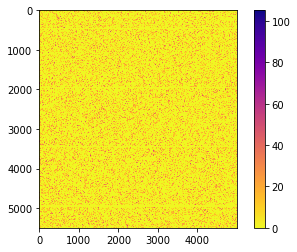

{'driver': 'SAFE', 'dtype': 'complex', 'nodata': None, 'width': 24178, 'height': 15100, 'count': 2, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'tiled': False}
(1, 21013)
(5500, 5000)
0.0 83.0 5.129790072727273


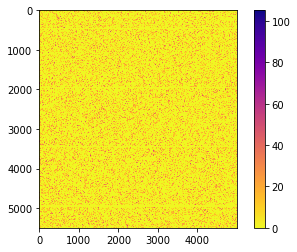

In [75]:
## open the file with rasterio
# SLC_fi = os.path.join('s1_files', SLC_dl['title'] + '.SAFE', 'manifest.safe')
SLC_fi = '/content/s1_files/S1A_IW_SLC__1SDV_20191209T003127_20191209T003155_030264_0375D2_F3F2.SAFE/manifest.safe'
# s1_filepath = r"C:\Projects\sentinel_api\s1_files\S1A_IW_RAW__0SSV_20161216T130058_20161216T130130_014405_0175A1_975B.SAFE\s1a-iw-raw-s-vv-20161216t130058-20161216t130130-014405-0175a1.dat"
# s1_filepath = r"C:/Projects/sentinel_api/s1_files/S1A_IW_GRDH_1SDV_20160830T010152_20160830T010217_012823_01439D_86AC.SAFE/manifest.safe"

for prd in (SLC_title, GRD_title):
    SLC_fi = os.path.join('s1_files', prd + '.SAFE', 'manifest.safe')
    with rasterio.open(SLC_fi, 'r') as src:
        print(src.profile)
        #arr = src.read() # careful... this could kill the kernel
        #print(arr.shape)

    with rasterio.open(SLC_fi, 'r') as src:    
        for ji, window in src.block_windows(1):
            r = src.read(1, window=window)
            print(r.shape)
            break

    with rasterio.open(SLC_fi, 'r') as src:
        r = src.read(1, window=((7000,12500), (7500,12500)))
        print(r.shape)

    if 'SLC' in prd:
        arr = np.abs(r)
        print(arr.min(), arr.max(), arr.mean())
        plt.imshow(arr, cmap='plasma_r', vmin=arr.min(), vmax=arr.mean() + 100)
        plt.colorbar()
        plt.show()
    else:
        print(r.min(), r.max(), r.mean())
        print('clipping to mean + 100')
        plt.imshow(r, cmap='plasma_r', vmin=r.min(), vmax=r.mean() + 100)
        plt.colorbar()
        plt.show()
        
    

# !gdalinfo $SLC_fi

(array([[0.  +0.j, 0. +79.j, 0.  +0.j, ..., 0. +88.j, 0.+163.j, 0. +95.j],
        [0.  +0.j, 0. +65.j, 0.  +0.j, ..., 0. +55.j, 0. +45.j, 0.  +0.j],
        [0. +11.j, 0. +18.j, 0.  +0.j, ..., 0. +61.j, 0. +36.j, 0.  +0.j],
        ...,
        [0.  +0.j, 0.  +0.j, 0.  +0.j, ..., 0.  +0.j, 0.  +0.j, 0.  +0.j],
        [0.  +0.j, 0. +18.j, 0. +27.j, ..., 0.  +0.j, 0. +34.j, 0. +71.j],
        [0. +37.j, 0. +60.j, 0. +20.j, ..., 0. +50.j, 0.  +0.j, 0.  +0.j]]),
 <matplotlib.image.AxesImage at 0x201b1af35f8>)

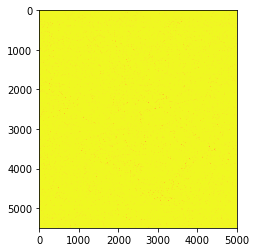

In [77]:
sub_arr = arr[:, 100:200, 100:200]
plt.imshow(sub_arr[0])
plt.show()
plt.imshow(sub_arr[1])
plt.show()
plt.imshow(sub_arr[0] - sub_arr[1])

IndexError: ignored

In [78]:
help(api.query)

Help on method query in module sentinelsat.sentinel:

query(area=None, date=None, raw=None, area_relation='Intersects', order_by=None, limit=None, offset=0, **keywords) method of sentinelsat.sentinel.SentinelAPI instance
    Query the OpenSearch API with the coordinates of an area, a date interval
    and any other search keywords accepted by the API.
    
    Parameters
    ----------
    area : str, optional
        The area of interest formatted as a Well-Known Text string.
    date : tuple of (str or datetime) or str, optional
        A time interval filter based on the Sensing Start Time of the products.
        Expects a tuple of (start, end), e.g. ("NOW-1DAY", "NOW").
        The timestamps can be either a Python datetime or a string in one of the
        following formats:
    
            - yyyyMMdd
            - yyyy-MM-ddThh:mm:ss.SSSZ (ISO-8601)
            - yyyy-MM-ddThh:mm:ssZ
            - NOW
            - NOW-<n>DAY(S) (or HOUR(S), MONTH(S), etc.)
            - NOW+<n